### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [1]:
# Importing librarys.
# --------------------
library(ggplot2)
library(lubridate)
library(dplyr)
# --------------------


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date


Attaching package: ‘dplyr’

The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [3]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [4]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [5]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


In [6]:
# Creating null columns of 'Gender' and 'Birth.Year' in the Washington dataset to be able to concatenate all.
# --------------------
wash$Gender <- NA
wash$Birth.Year <-NA
# --------------------

# Adding a new column 'City' to each dataset to retain info about city after concatenation.
# --------------------
ny$City <- 'New York City'
wash$City <- 'Washington'
chi$City <- 'Chicago'
# --------------------

#Creating a function for concatenation.
# --------------------
concatenation <- function(d1, d2) {
  return(rbind(d1, d2))
}
# --------------------

# Concatenating all three datasets together as "city".
# --------------------
city <- concatenation(ny,wash)
city <- concatenation(city,chi)
# --------------------

In [7]:
head(city)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,New York City
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,New York City
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,New York City
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,New York City
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,New York City
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,New York City


### Question 1
What is the average travel time for the users in the different cities?

In [8]:
# The count of users in each city.
# --------------------
total_city = sort(table(city$City))
print(total_city)
# --------------------

# The percentage of users in each city.
# --------------------
round((total_city / sum(total_city) * 100), digits = 2)
# --------------------


      Chicago New York City    Washington 
         8630         54770         89051 



      Chicago New York City    Washington 
         5.66         35.93         58.41 

Warning message:
“Removed 2 rows containing non-finite values (stat_summary).”

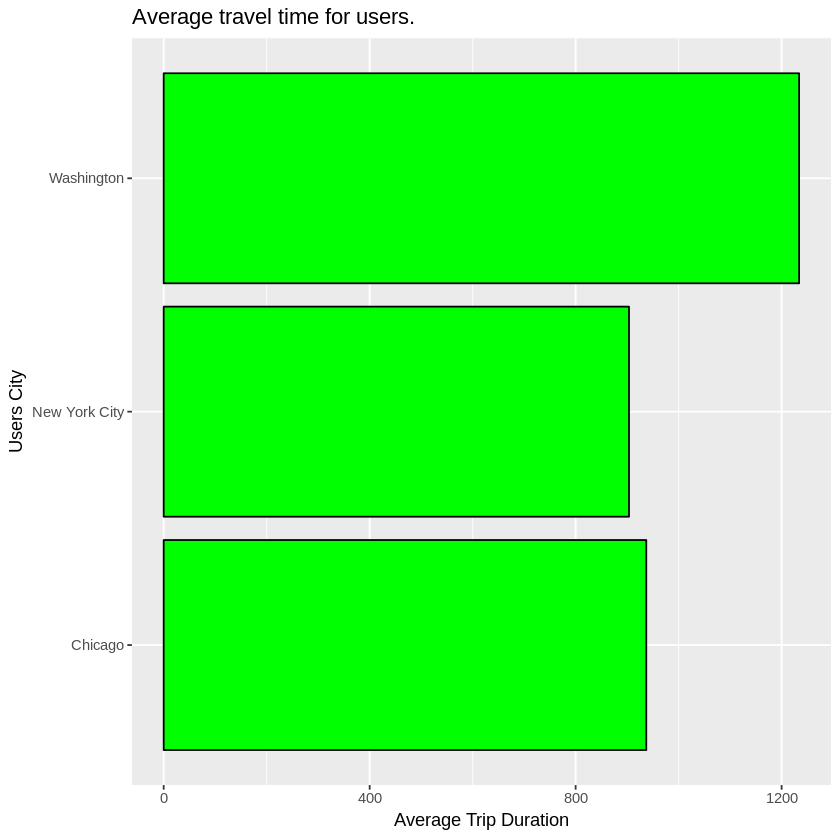

In [9]:
# Visualizing data with ggplot.
# --------------------
ggplot(aes(x = City, y = Trip.Duration), data = city) +
    geom_bar(position = 'dodge', stat = "summary", fun.y = "mean", fill = "green", colour="black") + 
    ggtitle('Average travel time for users.') +
    labs(y = 'Average Trip Duration', x = 'Users City') +
    coord_flip()
# --------------------

In [10]:
# Creating a summary of the average trip duration by city.
# --------------------
my.summary <- with(city, aggregate(list(Trip.Duration), by = list(City), 
                   FUN = function(x) { mon.mean = mean(x, na.rm = TRUE) } ))

colnames(my.summary) <- c('City', 'Average.Trip.Duration')
my.summary
# --------------------

City,Average.Trip.Duration
Chicago,937.1728
New York City,903.6147
Washington,1233.9533


# Question 1 Summary:

**User Distribution by City**

Chicago: 5.66% of users.

New York City: 35.93% of users.

Washington: 58.41% of users.

**Average Trip Duration:**

Washington leads in average trip duration with 1233.95 seconds, likely due to having the largest proportion of users.
Chicago has an average trip duration of 937.17 seconds, which is similar to New York City's average of 903.61 seconds.

Insight on Chicago's User Base:
While Chicago has the smallest percentage of users, its average trip duration is nearly equal to New York City's, despite the difference in user base size.

This shows that Washington has both the largest user base and the longest average trip duration, while Chicago and New York City have comparable trip durations despite differences in user percentages.

### Question 2

What is the amount of each gender that uses the bikeshare (only available for NYC and Chicago)?

In [11]:
# Creating new city2 by binding 'New York City' and 'Chicago' data. 
# The Washington data is omitted due to lack of information about 'Gender' and 'Birth.Year'.
# --------------------
city2 <- concatenation(chi,ny)
# --------------------

In [12]:
# The count of genders (male and female).
# --------------------
total = sort(table(city2$Gender))
print(total)
# --------------------

# The percentage of genders (male and female).
# --------------------
round((total / length(city2$Gender) * 100), digits = 2)
# --------------------


       Female   Male 
  7158  13882  42360 



       Female   Male 
 11.29  21.90  66.81 

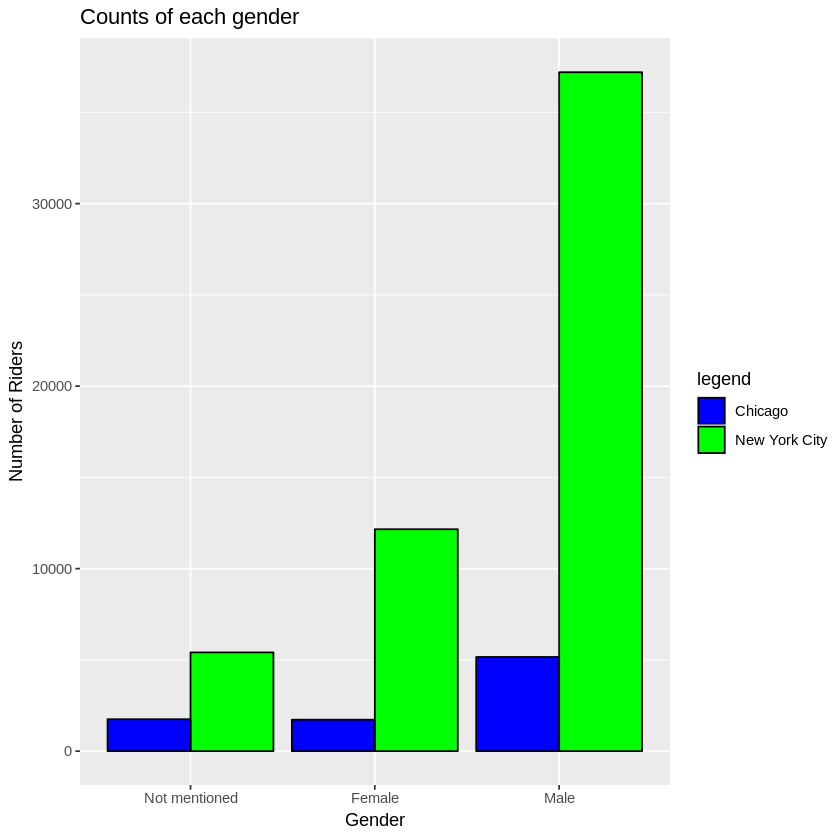

In [13]:
# Visualizing data with ggplot.
# --------------------
ggplot(aes(x = Gender, fill = City), data = city2) +
    geom_bar(position = 'dodge', colour="black") +
    ggtitle('Counts of each gender') +
    scale_x_discrete(labels = c('Not mentioned', 'Female', 'Male')) +
    labs(y = 'Number of Riders', x = 'Gender') +
    scale_fill_manual("legend", values = c("Chicago" = "blue", "New York City" = "green"))
# --------------------

In [14]:
# The count of gender (male and female) in Chicago.
# --------------------
total_chi = sort(table(city2$Gender[city2$City == 'Chicago']))
print(total_chi)
# --------------------

# The percentage of gender (male and female) in Chicago.
# --------------------
round((total_chi / length(city2$Gender[city2$City == 'Chicago']) * 100), digits = 2)
# --------------------


Female          Male 
  1723   1748   5159 



Female          Male 
 19.97  20.25  59.78 

In [15]:
# The count of gender (male and female) in New York City.
# --------------------
total_ny = sort(table(city2$Gender[city2$City == 'New York City']))
print(total_ny)
# --------------------
# The percentage of gender (male and female) in New York City.
# --------------------
round((total_ny / length(city2$Gender[city2$City == 'New York City']) * 100), digits = 2)
# --------------------


       Female   Male 
  5410  12159  37201 



       Female   Male 
  9.88  22.20  67.92 

# Question 2 Summary: 

Washington data is omitted because it lacks information on users' gender and birth year.

**Gender Distribution in Chicago and New York City:**
Across both cities, the total number of users is categorized as the following.
 - Males: 42,360 (66.81%)
 - Females: 13,882 (21.90%)
 - Not Mentioned: 7,158 (11.29%)

**Gender Proportions in Each City:**

New York City:
 - Males: 67.92%
 - Females: 22.20%
 - Not Mentioned: 9.88%

Chicago:
 - Males: 59.78%
 - Females: 19.97%
 - Not Mentioned: 20.25%
 
**Key Insights:**
Males (42,360) rent significantly more bikes than females (13,882) across both cities. A portion of users did not disclose their gender (7,158 users, 11.29% of total), which could reflect missing or deliberately undisclosed data.

### Question 3

What is the most popular month chosen for the bikeshare usage?

In [16]:
# Re-formatting the date columns.
# --------------------
city$Start.Time <- ymd_hms(city$Start.Time)
city$End.Time <- ymd_hms(city$End.Time)
# --------------------

# Creating new column 'Month' extracting from Start.Time.
# --------------------
city$Month <- month(city$Start.Time)
# --------------------

Warning message:
“ 1 failed to parse.”

Warning message:
“Removed 1 rows containing non-finite values (stat_count).”

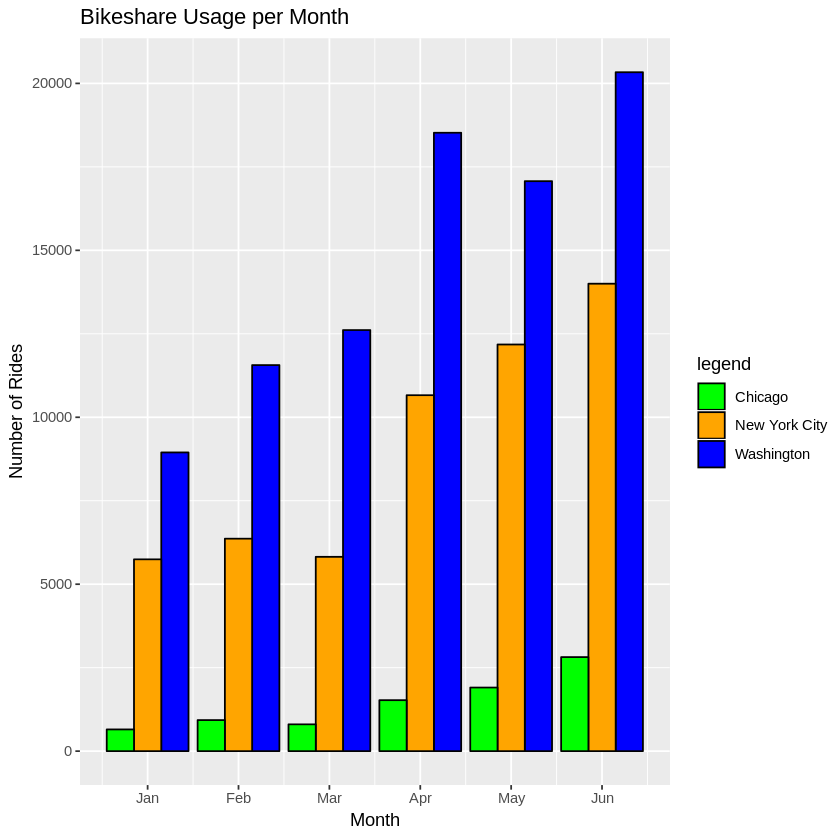

In [17]:
# Visualizing data with ggplot.
# --------------------
ggplot(aes(x = Month, fill = City), data = city) +
    geom_bar(position = 'dodge', colour="black") +
    scale_x_continuous(breaks = c(1,2,3,4,5,6), labels = c('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun')) +
    ggtitle('Bikeshare Usage per Month') +
    labs(y = 'Number of Rides', x = 'Month') +
    scale_fill_manual("legend", values = c("Chicago" = "green", "New York City" = "orange", "Washington" = "blue"))
# --------------------

In [18]:
# Printing the totals of usage for each month for the city of Chicago, sorted by month.
# --------------------
total_chi_month = sort(table(city$Month[city$City == 'Chicago']))
print(total_chi_month)
# --------------------


   1    3    2    4    5    6 
 650  803  930 1526 1905 2816 


In [19]:
# Printing the totals of usage for each month for the city of New York City, sorted by month.
# --------------------
total_ny_month = sort(table(city$Month[city$City == 'New York City']))
print(total_ny_month)
# --------------------


    1     3     2     4     5     6 
 5745  5820  6364 10661 12180 14000 


In [20]:
# Printing the totals of usage for each month for the city of Washington, sorted by month.
# --------------------
total_wash_month = sort(table(city$Month[city$City == 'Washington']))
print(total_wash_month)
# --------------------


    1     2     3     5     4     6 
 8946 11563 12612 17072 18522 20335 


In [21]:
# Printing the grand total of usage for all cities, sorted by month.
# --------------------
grand_total = sort(table(city$Month))
print(grand_total)
# --------------------


    1     2     3     4     5     6 
15341 18857 19235 30709 31157 37151 


# Question 3 Summary

The most popular month in all three cities of Chicago, New York City, and Washington is the 6th month, June. 

The least popular month in all three cities of Chicago, New York City, and Washington is the 1st month, January.

Looking at the numbers, the totals grow each month and nearly double from March to April (Months 3 & 4).This could be occuring due to the fact that the earlier months are colder and as it warms up more people are willing to use the bikeshare. An investigation could be delved into this if we also had tempature statistics for those months.


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [23]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')